In [1]:
import numpy as np
import pandas as pd
import cv2

In [2]:
def load_data(dir):
    # Initialize lists to store file paths and corresponding labels
    filepaths = []
    labels = []

    # Loop through each folder (label) in the train directory
    for label_name in os.listdir(dir):
        # Ignore hidden files
        if label_name.startswith('.'):
            continue
        
        # Define the path to the label folder
        label_path = os.path.join(dir, label_name)
        
        # Loop through each image in the label folder
        for img_name in os.listdir(label_path):
            img_path = os.path.join(label_path, img_name)
            filepaths.append(img_path)
            labels.append(label_name)

    # Create a DataFrame by combining the file paths and labels
    return pd.DataFrame({
        'filepath': filepaths,
        'label': labels
    })

In [3]:
# Load the training data
train_dir = '/tmp/chest_xray/train/'
df_train = load_data(train_dir)

# Load the test data
test_dir = '/tmp/chest_xray/test/'
df_test = load_data(test_dir)

# Load the validation data
val_dir = '/tmp/chest_xray/val/'
df_val = load_data(val_dir)


In [4]:
print(f"The shape of The Train data is: {df_train.shape}")
print(f"The shape of The Test data is: {df_test.shape}")
print(f"The shape of The Validation data is: {df_val.shape}")

The shape of The Train data is: (5218, 2)
The shape of The Test data is: (624, 2)
The shape of The Validation data is: (18, 2)


In [5]:
import tensorflow as tf

# Set image size and batch size
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 123

# Create the training dataset
print('Training Images:')
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    validation_split=0.1,
    subset='training',
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

# Create the testing dataset
print('Testing Images:')
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory=test_dir,
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

# Create the validation dataset
print('Validation Images:')
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    validation_split=0.1,
    subset='validation',
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

2025-05-10 17:10:05.646156: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-10 17:10:05.778301: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
Training Images:
Found 5216 files belonging to 2 classes.
Using 4695 files for training.
2025-05-10 17:10:07.928503: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-05-10 17:10:08.30

In [6]:
from sklearn.preprocessing import LabelEncoder

# Extract labels
train_labels = train_ds.class_names
test_labels = test_ds.class_names
validation_labels = validation_ds.class_names

# Encode Labels

# Define your class labels
class_labels = ['NORMAL', 'PNEUMONIA'] 

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder on the class labels
label_encoder.fit(class_labels)

# Transform the labels for training dataset
train_labels_encoded = label_encoder.transform(train_labels)

# Transform the labels for validation dataset
validation_labels_encoded = label_encoder.transform(validation_labels)

# Transform the labels for test dataset
test_labels_encoded = label_encoder.transform(test_labels)


In [7]:
# Shape of the dataset
for image_batch, labels_batch in train_ds:
    print("Shape of X_train: ", image_batch.shape)
    print("Shape of y_train: ", labels_batch.shape)
    break

Shape of X_train:  (32, 224, 224, 3)
Shape of y_train:  (32,)


/tmp/ipykernel_1030/28939585.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_1030/28939585.py:25: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(


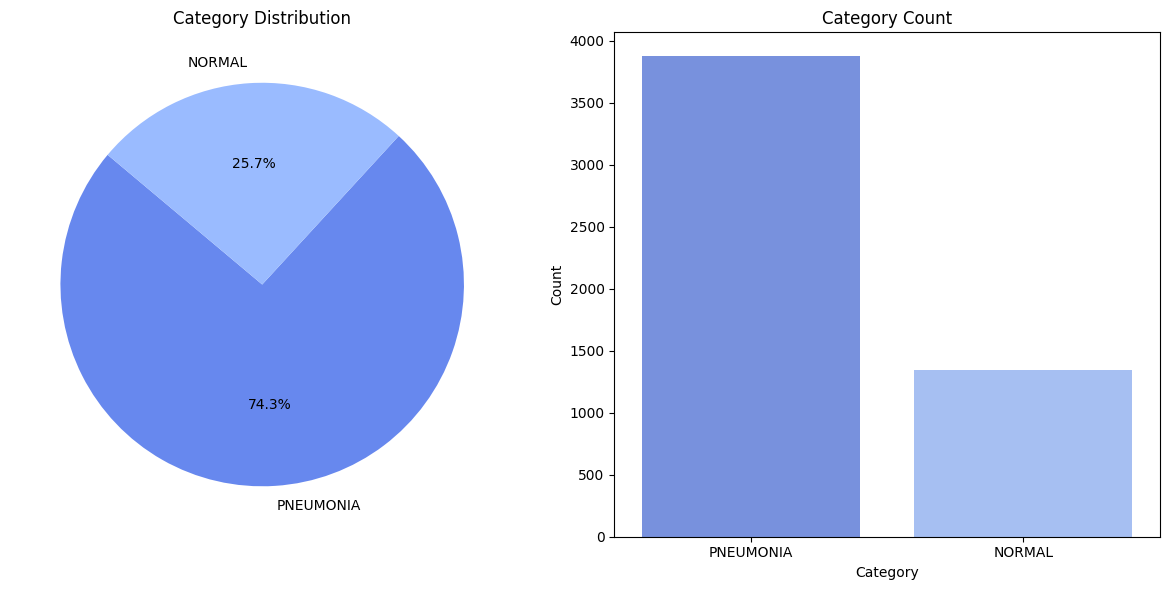

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each label
label_counts = df_train['label'].value_counts()

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Set the new color palette
palette = sns.color_palette("coolwarm")
sns.set_palette(palette)

# Plot the pie chart
axes[0].pie(
    label_counts,
    labels=label_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=palette
)
axes[0].set_title('Category Distribution')

# Plot the bar chart
sns.barplot(
    x=label_counts.index,
    y=label_counts.values,
    ax=axes[1],
    palette=palette
)
axes[1].set_title('Category Count')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Category')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


/tmp/ipykernel_1030/324591394.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_1030/324591394.py:22: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(


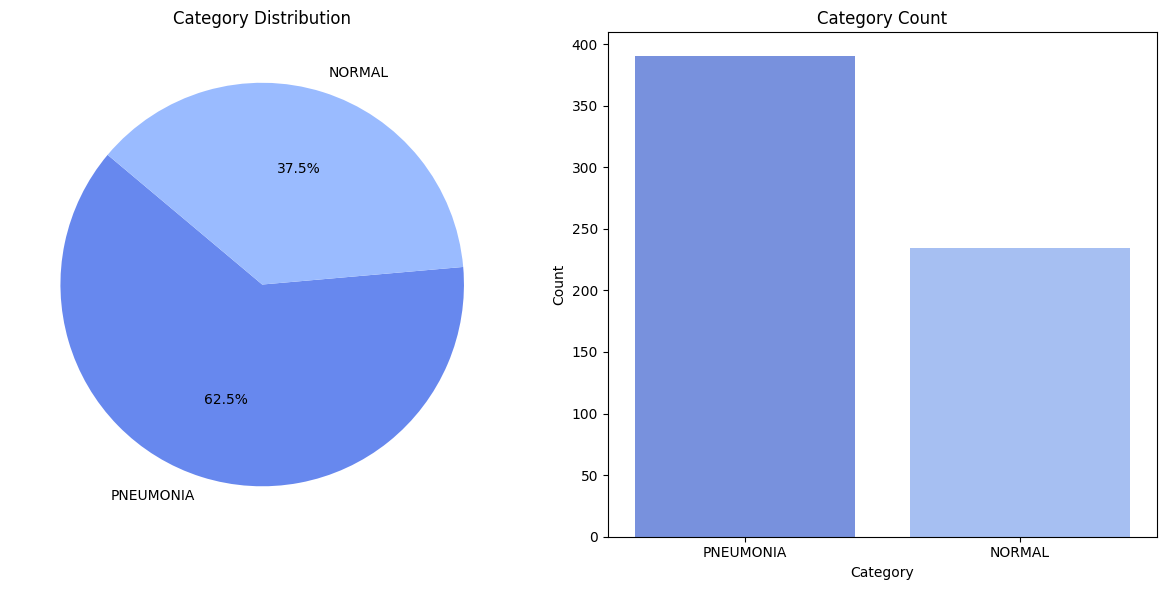

In [9]:
# Count the occurrences of each label
label_counts = df_test['label'].value_counts()

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Set the new color palette
palette = sns.color_palette("coolwarm")
sns.set_palette(palette)

# Plot the pie chart
axes[0].pie(
    label_counts,
    labels=label_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=palette
)
axes[0].set_title('Category Distribution')

# Plot the bar chart
sns.barplot(
    x=label_counts.index,
    y=label_counts.values,
    ax=axes[1],
    palette=palette
)
axes[1].set_title('Category Count')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Category')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

In [10]:
import matplotlib.image as mpimg

def visualize_images(path, num_images=5):
    """
    Visualizes a set number of images from the specified directory.

    Parameters:
    - path (str): Directory containing images.
    - num_images (int): Number of images to visualize (default is 5).
    """
    # Get all image filenames in the given path
    image_filenames = os.listdir(path)

    # Remove non-image files
    image_filenames = [filename for filename in image_filenames if filename.endswith('.jpeg')]
    
    # Make sure we don't exceed the number of available images
    num_images = min(num_images, len(image_filenames))
    
    # Set up the figure
    fig, axes = plt.subplots(1, num_images, figsize=(15, 4), facecolor='white')

    # If only one image, make axes iterable
    if num_images == 1:
        axes = [axes]

    # Loop through and display each image
    for idx, filename in enumerate(image_filenames[:num_images]):
        img_path = os.path.join(path, filename)
        image = mpimg.imread(img_path)
        
        axes[idx].imshow(image)
        axes[idx].axis('off')
        axes[idx].set_title(filename, fontsize=10)

    plt.tight_layout()
    plt.show()

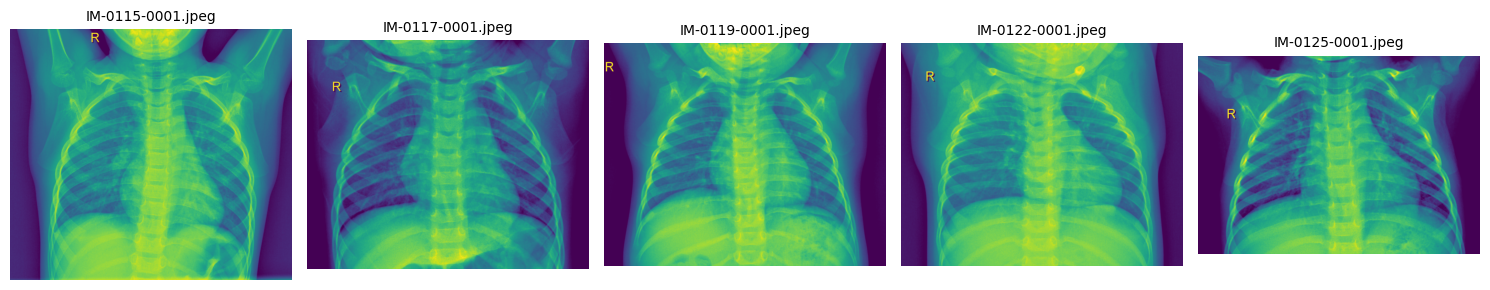

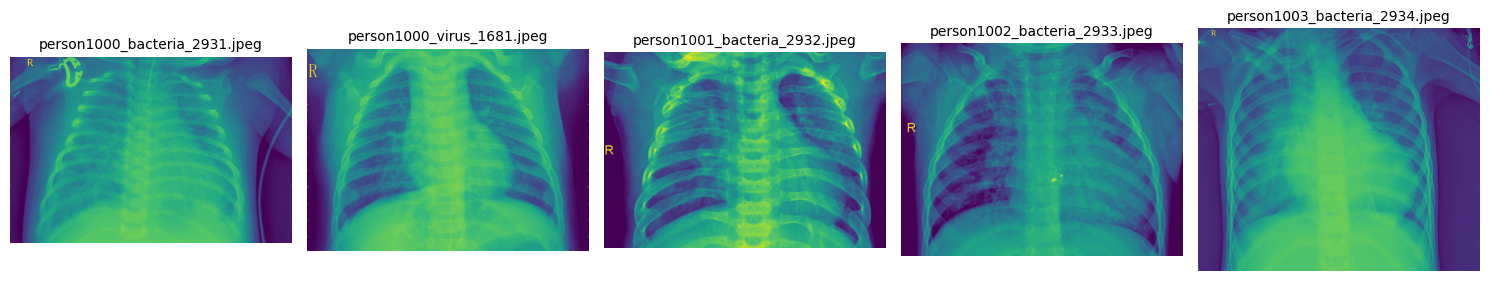

In [11]:
# Specify the path containing the images to visualize
path_to_visualize = '/tmp/chest_xray/train/NORMAL'

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)


# Specify the path containing the images to visualize
path_to_visualize = '/tmp/chest_xray/train/PNEUMONIA'

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)



In [12]:
import tensorflow as tf
from tensorflow import keras

def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ]
    )
    
    return block


def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block


def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),

        # Normalization
        tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model


In [13]:
# Import required modules
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# Build the model
model = build_model()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Early_Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Class weights
class_weights = {0: 1.5, 1: 0.5}

# Fitting Model
history = model.fit(train_ds,
                   epochs=50,
                   validation_data=validation_ds,
                   class_weight=class_weights,
                   callbacks=[early_stopping])  # Note: callbacks should be a list

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 sequential (Sequential)     (None, 56, 56, 32)        2160      
                                                                 
 sequential_1 (Sequential)   (None, 28, 28, 64)        7392      
                                                      

In [14]:
# Evaluate the model on the validation dataset
validation_loss, validation_accuracy = model.evaluate(validation_ds)

# Print the validation loss and accuracy
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds)

# Print the validation loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

17/17 [==============================] - 1s 33ms/step - loss: 0.0489 - accuracy: 0.9789
Validation Loss: 0.04886757209897041
Validation Accuracy: 0.9788867831230164
20/20 [==============================] - 1s 41ms/step - loss: 0.6845 - accuracy: 0.8061
Test Loss: 0.6844532489776611
Test Accuracy: 0.8060897588729858


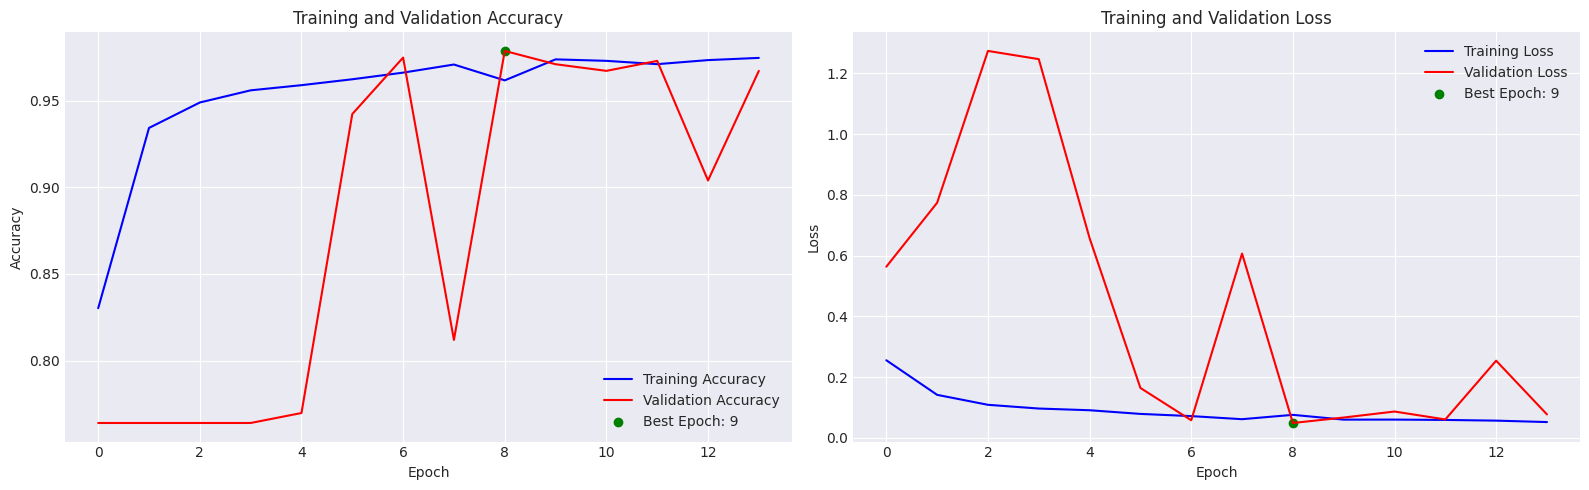

In [15]:
# Get the epoch with the highest validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Set the background style
plt.style.use('seaborn-v0_8-darkgrid')

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 21ms/step


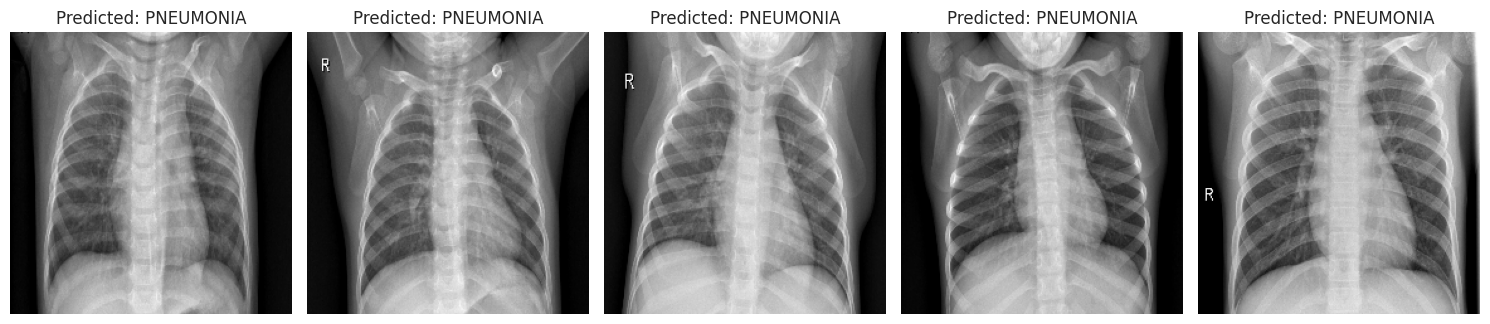

In [16]:
# Path to the directory containing the images
directory_path = '/tmp/chest_xray/test/NORMAL'

# Select N image files from the directory
image_files = os.listdir(directory_path)[40:45]

# Create a figure and axes for subplots
fig, axs = plt.subplots(1, len(image_files), figsize=(15, 5))

# Load and preprocess each image, make predictions, and display them using a loop
for i, image_file in enumerate(image_files):
    img_path = os.path.join(directory_path, image_file)
    # Load the image using OpenCV
    img = cv2.imread(img_path)
    # Resize the image to (256, 256)
    img = cv2.resize(img, (224, 224)) 

    # Normalize pixel values
    img_array = img.astype(np.float32) / 255.0  

    # Expand the dimensions to match the input shape expected by the model
    img_array = np.expand_dims(img_array, axis=0)
    
     # Make predictions
    predictions = model.predict(img_array)
    actual_prediction = (predictions > 0.5).astype(int)
    
    # Display the image with predicted label
    # Convert BGR to RGB for displaying with matplotlib
    axs[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  
    axs[i].axis('off')
    if actual_prediction[0][0] == 0:
        predicted_label = 'Normal'
    else:
        predicted_label = 'PNEUMONIA'
    axs[i].set_title(f'Predicted: {predicted_label}')

# Adjust layout
plt.tight_layout()
plt.show()

In [17]:
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)  # Output shape: (batch_size, 1)
    y_true.extend(labels.numpy())
    y_pred.extend((preds > 0.5).astype(int).flatten())

1/1 [==============================] - 0s 24ms/step


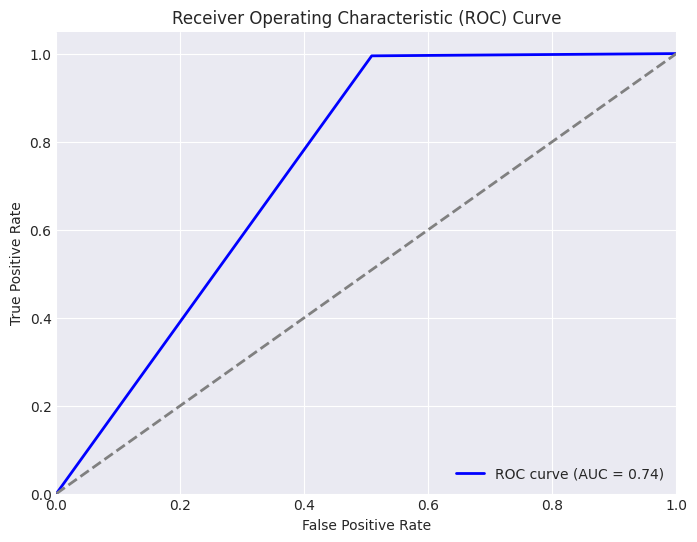

ROC AUC Score: 0.74


In [18]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Calculate the ROC curve values
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Calculate the ROC AUC score using sklearn's roc_auc_score
roc_auc_score_value = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the ROC AUC score
print(f'ROC AUC Score: {roc_auc_score_value:.2f}')

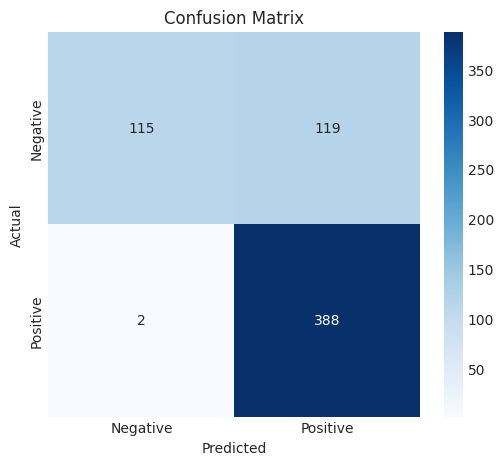

In [19]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [20]:
from sklearn.metrics import classification_report

# 4. Generate classification report
print(classification_report(y_true, y_pred, target_names=['Normal', 'Pneumonia']))

              precision    recall  f1-score   support

      Normal       0.98      0.49      0.66       234
   Pneumonia       0.77      0.99      0.87       390

    accuracy                           0.81       624
   macro avg       0.87      0.74      0.76       624
weighted avg       0.85      0.81      0.79       624



In [21]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification

clf = SGDClassifier(max_iter=1000, tol=1e-3)

for images, labels in train_ds:
    x = images.numpy()
    # Convert 224x224x3 image to 1x150528
    x = x.reshape(-1, 224*224*3)
    
    y = labels.numpy()
    clf.partial_fit(x, y, classes=[0, 1])

In [22]:
y_true = []
y_pred = []

for images, labels in test_ds:
    x = images.numpy()
    # Convert 224x224x3 image to 1x150528
    x = x.reshape(-1, 224*224*3)
    # Normalize pixel values to a mean of 0 and standard deviation of 1
    x = (x - np.mean(x)) / np.std(x)

    preds = clf.predict(x)  # Output shape: (batch_size, 2)
    y_true.extend(labels.numpy())
    y_pred.extend(preds)

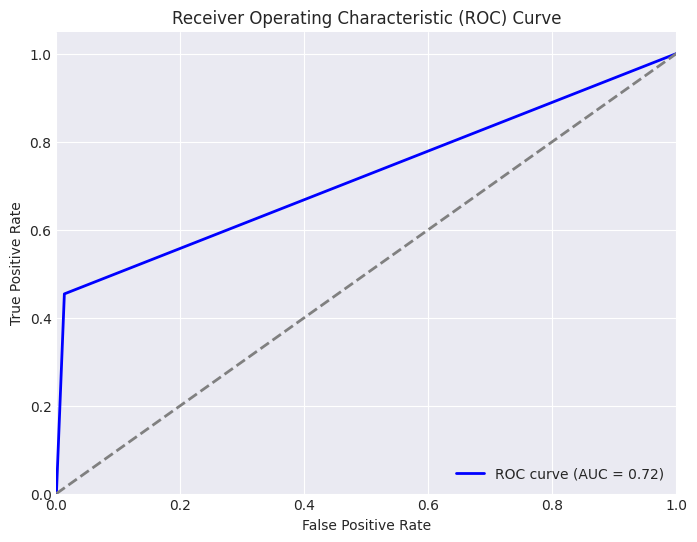

In [23]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Calculate the ROC curve values
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Calculate the ROC AUC score using sklearn's roc_auc_score
roc_auc_score_value = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

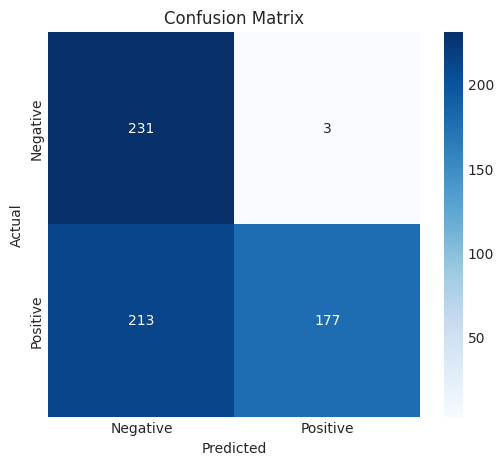

In [24]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [25]:
from sklearn.metrics import classification_report

# 4. Generate classification report
print(classification_report(y_true, y_pred, target_names=['Normal', 'Pneumonia']))

              precision    recall  f1-score   support

      Normal       0.52      0.99      0.68       234
   Pneumonia       0.98      0.45      0.62       390

    accuracy                           0.65       624
   macro avg       0.75      0.72      0.65       624
weighted avg       0.81      0.65      0.64       624



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f18e8e36-514b-4461-9b3c-37884e095599' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>